
### MiniProject 5: Finance Portfolio

**DISCLAIMER:** THIS NOTEBOOK IS PROVIDED ONLY AS A REFERENCE SOLUTION NOTEBOOK FOR THE MINI-PROJECT. THERE MAY BE OTHER POSSIBLE APPROACHES/METHODS TO ACHIEVE THE SAME RESULTS.

## Learning Objectives

At the end of the experiment, you will be able to:

* build a finance portfolio
* optimize and find the maximum return, minimum risk of a portfolio
* cluster the asset parameters to group the similar assets
* select the optimal portfolio of diversified assets


## Dataset

Dataset chosen for this mini project is Dow Jones Industrial Average (DJIA) Index viz., Apple (AAPL), American Express (AXP), Boeing (BA), Caterpillar (CAT), Cisco Systems (CSCO), Chevron (CVX), Walt Disney (DIS), Goldman Sachs (GS), The Home Depot (HD), IBM (IBM), Intel (INTC), Johnson & Johnson (JNJ), JP Morgan Chase (JPM), Coca-Cola (KO), McDonald's (MCD), 3M(MMM), Merck & Co (MRK), Microsoft (MSFT), Nike (NKE), Pfizer (PFE), Procter & Gamble (PG), Travelers (TRV), United Health Group (UNH), United Technologies (UTX), Verizon (V), Verizon (VZ), Walgreens Boots Alliance (WBA), Walmart (WMT), Exxon Mobil (XOM).

The data set considered is from April 11, 2014 to April 11, 2019. Fig. 3.4 illustrates a snapshot of the DJIA dataset.

![img](https://github.com/PaiViji/PythonFinance-PortfolioOptimization/raw/2bb0ae9f32f44ff66302ea33f53c02e746583a05/Lesson3_HeuristicPortfolioSelection/Lesson3Fig3_4.png)

 

## Information



The universe of stocks can truly baffle investors who wish to make the best selection of stocks for their portfolios. It is a daunting task to make a prudent selection of stocks, given the vastness of the choices and the diverse behavioural characteristics of each of these stocks with respect to itself and to one another

**Portfolio Return and Risk:**
Harry Markowtiz proposed a framework known as Mean-Variance Analysis which won him the 1990 Nobel Prize in Economics. The framework laid the foundation for what is known as the Modern Portfolio Theory, that views the *portfolio return* as the capital gain that can be expected by holding a portfolio and *portfolio risk* as the extent of capital losses that it can suffer possibly due to adverse market movements. Portfolio return and risk were modelled using the mean and variance of the portfolio's fluctuations respectively.

**Diversification Index:**
A Diversification Index quantifies diversification. There are several diversification indices discussed in the literature. Diversification Ratio proposed and patented by Yves Choueifaty in 2008 [CHO 08, CHO 13], is a diversification index of recent origin, built on the inter-dependence between assets of a portfolio. Diversification Ratio is the ratio of the weighted sum of individual asset volatilities to the portfolio's volatility.

**Efficient Frontier:** An efficient frontier is a set of investment portfolios that are expected to provide the highest returns at a given level of risk. A portfolio is said to be efficient if there is no other portfolio that offers higher returns for a lower or equal amount of risk. Where portfolios are located on the efficient frontier depends on the investor’s degree of risk tolerance.

**Sharpe Ratio:** The Sharpe ratio was developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

## Objectives:

* How can the investor decide on which combination of assets is the best?
* How can diversification be ensured, when the assets belong to different sectors and therefore behave differently under varying market conditions?
* How would an investor determine the optimal weights, which will ensure maximum return risk for the portfolio invested in ?
* How would an investor know how much to invest in each one of the assets in the portfolio ?

## Grading = 10 Points

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/DJIA_Apr112014_Apr112019.csv

### Import required Packages 

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

### Data Preparation (1 point)




In [2]:
#input stock dataset
StockFileName = 'DJIA_Apr112014_Apr112019.csv'

#read stock prices 
df = pd.read_csv(StockFileName)
print(df.shape)
df.head()

(1259, 30)


,Date,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
0,11/04/14,74.230003,84.540001,122.070000,101.449997,22.459999,117.029999,77.010002,152.720001,75.699997,...,29.860001,80.760002,85.300003,78.949997,113.930000,49.157501,47.070000,64.260002,76.500000,96.720001
1,14/04/14,74.525711,85.500000,123.250000,102.779999,22.850000,118.699997,77.620003,154.740005,75.970001,...,29.870001,80.809998,85.500000,79.180000,114.940002,50.252499,47.270000,65.669998,77.379997,97.860001
2,15/04/14,73.994286,86.040001,124.269997,102.500000,22.889999,120.300003,77.660004,154.919998,75.889999,...,29.889999,80.839996,85.889999,79.510002,115.839996,51.012501,46.919998,66.010002,76.879997,98.680000
3,16/04/14,74.144287,87.400002,126.040001,102.930000,23.030001,121.830002,78.949997,157.220001,76.580002,...,30.090000,81.650002,86.779999,78.190002,118.070000,52.340000,47.099998,66.160004,77.220001,99.940002
4,17/04/14,74.991432,86.220001,127.919998,102.830002,23.209999,123.680000,79.989998,157.440002,77.089996,...,30.250000,81.760002,86.680000,75.779999,118.570000,51.987499,47.599998,66.750000,77.660004,100.419998


In [7]:
df.shape

(1259, 30)

In [ ]:
# below subset is selected based on k-means
#df = df[['BA','IBM','CAT','AAPL']]

#### Data Summarization

* Remove Date column and summarize the data

In [11]:
Rows = len(df)  
Columns = len(df.columns[1:]) # excluding date

# extract asset labels
assetLabels = df.columns[1:Columns+1].tolist()
print('portfolio asset labels:\n', assetLabels)

# extract stock prices excluding header and trading dates
dfStockPrices = df.iloc[:, 1:]
#print(dfStockPrices)
# store stock prices as an array
arStockPrices = np.asarray(dfStockPrices)
rows, cols= arStockPrices.shape
print(rows,cols)

portfolio asset labels:
 ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA', 'WMT', 'XOM']
1259 29


#### Compute the stock returns

* Compute the mean of returns and covariance of returns

In [12]:
# function to compute stock returns
def StockReturnsComputing(StockPrice, Rows, Columns):
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):  # j: Assets
        for i in range(Rows-1):     #i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])
    return StockReturn

# compute asset returns
arReturns = StockReturnsComputing(arStockPrices, Rows, Columns)

# Alternate code
#arReturns = pd.DataFrame(arStockPrices).pct_change().dropna().values
print('k-portfolio 1 returns:\n', arReturns)

k-portfolio 1 returns:
 [[ 0.00398367  0.01135556  0.00966658 ...  0.02194205  0.01150323
   0.0117866 ]
 [-0.00713076  0.0063158   0.00827584 ...  0.00517746 -0.00646162
   0.00837931]
 [ 0.0020272   0.01580661  0.01424321 ...  0.00227241  0.00442253
   0.01276857]
 ...
 [-0.00299853 -0.0076784  -0.01463201 ... -0.01017074 -0.00544191
  -0.01289157]
 [ 0.00561401  0.00282208 -0.01110993 ...  0.00018345  0.00922075
  -0.00451607]
 [-0.00832419 -0.00281414  0.01430373 ... -0.01962941  0.01204824
   0.00478174]]


In [13]:
#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
print('Mean returns of k-portfolio 1:\n', meanReturns)
covReturns = np.cov(arReturns, rowvar=False)
print('\nVariance-Covariance matrix of returns of k-portfolio 1: ')
print('Size  ', covReturns.shape)

Mean returns of k-portfolio 1:
 [ 9.02759761e-04  2.91002178e-04  9.96644943e-04  3.86567003e-04
  8.09992956e-04  1.55150853e-04  3.97538062e-04  3.31387657e-04
  8.47901377e-04 -1.61102228e-04  7.27422090e-04  3.15481134e-04
  6.04105771e-04  1.91569684e-04  5.65341938e-04  4.42214370e-04
  3.57998589e-04  9.97435940e-04  8.00864357e-04  3.37582842e-04
  2.51423106e-04  4.25465919e-04  9.54807585e-04  1.87158182e-04
  1.01281343e-03  2.31432075e-04 -1.68527771e-05  2.94624799e-04
 -6.10160493e-05]

Variance-Covariance matrix of returns of k-portfolio 1: 
Size   (29, 29)


### Portfolio Return and Portfolio Risk ( 2 points)


* Apply equal weighted portfolio construction method to portfolio
* Obtain the annualized risk (%) and the expected annual return (%) of the portfolio



Let P be a portfolio comprising assets $A_1, A_2,...A_N$ with weights $W_1, W_2,...W_N$ and $r_1, r_2, ...r_N$ as the asset returns. The portfolio return r determined by a weighted summation of its individual asset returns is given by,
 $$r = W_1 . r_1 + W_2 . r_2 + .. W_N . r_N = \sum_{i=1}^N W_i . r_i $$

The annualized portfolio return assuming that the number of trading days in a year were $T_y$ ( for example, 261 out of 365 days in a year), is given by,

$$r_{Ann} = \Bigg( \sum_{i=1}^N W_i . r_i \Bigg) . T_y$$

Portfolio risk is the standard deviation of its returns and is given by,

$$ \sigma = \sqrt{\sum_i \sum_j W_i . W_j . \sigma_{ij}}$$


where $\sigma_{ij}$ is the covariance of returns between assets i and j of the portfolio, also referred to as the variance-covariance matrix of returns. Standard deviation is a prominent measure of dispersion of data borrowed from Statistics and describes the deviation or spread of the data from its mean. In the case of portfolios, standard deviation of its returns, which is its risk, helps to measure the consistency of the returns. The annualized portfolio risk in percentage,  $\sigma_{Ann}$ is given by,

$$ \sigma_{Ann} = \sqrt{ \Bigg(\sum_i \sum_j W_i . W_j . \sigma_{ij} \Bigg) . T_y}$$

where $T_y$ is the number of trading days in a year.



In [14]:
#equal weighted portfolio construction: Annualized risk and 
#expected annualized portfolio return
#trading days = 251
PortfolioSize = Columns
EqualWeightVector = np.ones((1,PortfolioSize))*(1.0/PortfolioSize)
EqWgtPortfolioRisk = np.sqrt(np.matmul((np.matmul(EqualWeightVector,covReturns)), \
                     np.transpose(EqualWeightVector)))
EqWgtAnnPortfolioRisk = EqWgtPortfolioRisk*np.sqrt(251)*100
#print(EqualWeightVector.shape, np.transpose(meanReturns).shape)
EqWgtPortfolioReturn = np.matmul(EqualWeightVector, np.transpose(meanReturns))
EqWgtAnnPortfolioReturn = 251*EqWgtPortfolioReturn * 100

print("Annualized Portfolio Risk :  %4.2f" % EqWgtAnnPortfolioRisk, "%")
print("\nAnnualized Expected Portfolio Return:  %4.2f" %  EqWgtAnnPortfolioReturn,"%")

Annualized Portfolio Risk :  12.84 %

Annualized Expected Portfolio Return:  11.75 %


### Cluster the Assets using K-Means (2 points)


* Prepare the data for K-Means by concatenating mean returns and covariance returns

* Find the suitable k parameter and fit the model

* Label the nearest assets in clusters

In [15]:
#prepare asset parameters for k-means clustering
#reshape for concatenation
meanReturns1 = meanReturns.reshape(len(meanReturns),1)
assetParameters = np.concatenate([meanReturns1, covReturns], axis = 1)
print('Size of the asset parameters for clustering:\n', assetParameters.shape)

Size of the asset parameters for clustering:
 (29, 30)


In [16]:
assetParameters

array([[ 9.02759761e-04,  2.37512857e-04,  6.71599544e-05,
         9.61962987e-05,  1.04226142e-04,  9.98902354e-05,
         6.64133115e-05,  6.80024869e-05,  9.54038503e-05,
         7.26309677e-05,  7.09458591e-05,  1.07333017e-04,
         4.85720944e-05,  8.25100597e-05,  3.06010109e-05,
         4.58232832e-05,  7.32180003e-05,  5.34339768e-05,
         1.22660419e-04,  7.75242233e-05,  5.44477097e-05,
         4.19176613e-05,  5.09432023e-05,  7.74334175e-05,
         6.92747986e-05,  1.00867010e-04,  2.93546612e-05,
         6.97358959e-05,  4.45879452e-05,  6.32728233e-05],
       [ 2.91002178e-04,  6.71599544e-05,  1.64817768e-04,
         8.00081985e-05,  9.50281302e-05,  7.00105078e-05,
         6.30806124e-05,  5.68721386e-05,  1.06463549e-04,
         6.58266148e-05,  6.62519411e-05,  7.37897725e-05,
         4.71964663e-05,  1.00101545e-04,  3.07430290e-05,
         3.50376560e-05,  6.52684933e-05,  5.55680773e-05,
         7.94514400e-05,  6.81126308e-05,  5.41560629e-

In [19]:
#kmeans clustering of assets using the characteristic vector of 
#mean return and variance-covariance vector of returns

assetsCluster= KMeans(algorithm='lloyd',  max_iter=600, n_clusters=4)
print('Clustering of assets completed!') 
assetsCluster.fit(assetParameters)
centroids = assetsCluster.cluster_centers_
labels = assetsCluster.labels_

print('Centroids:\n', centroids)
print('Labels:\n', labels)

Clustering of assets completed!
Centroids:
 [[ 4.50374389e-04  7.43038607e-05  7.31825471e-05  8.62162368e-05
   1.15908555e-04  7.79837701e-05  7.65545047e-05  7.06515273e-05
   1.12024500e-04  6.56417205e-05  6.57373789e-05  8.18559638e-05
   4.99716961e-05  1.02879198e-04  3.51943131e-05  5.30091109e-05
   7.91145574e-05  5.62233871e-05  8.21071604e-05  6.51134982e-05
   5.30786425e-05  3.80014338e-05  6.90759591e-05  6.40798659e-05
   6.82030353e-05  7.60845067e-05  4.05898195e-05  6.36863554e-05
   4.11368785e-05  6.82401969e-05]
 [ 8.94515827e-04  1.10227605e-04  7.34323272e-05  1.02989437e-04
   9.90892072e-05  1.00903978e-04  6.99658959e-05  6.64976126e-05
   9.28147337e-05  8.20807749e-05  7.27475067e-05  1.13424855e-04
   5.35229613e-05  8.53962515e-05  3.61675968e-05  4.75013559e-05
   7.51300227e-05  5.85848674e-05  1.15268190e-04  9.45339172e-05
   5.88584319e-05  4.17838164e-05  5.73159366e-05  8.33254237e-05
   7.13756954e-05  1.00915152e-04  3.93845535e-05  7.26229726e-

In [20]:
#fixing asset labels to cluster points
print('Stocks in each of the clusters:\n',)
assets = np.array(assetLabels)
for i in range(len(set(labels))):
    print('Cluster', i+1)
    clt  = np.where(labels == i)
    assetsCluster = assets[clt]
    print(assetsCluster)

Stocks in each of the clusters:

Cluster 1
['CAT' 'DIS' 'GS' 'JPM' 'MCD' 'MMM' 'TRV']
Cluster 2
['AAPL' 'BA' 'CSCO' 'HD' 'INTC' 'MSFT' 'NKE' 'UNH' 'V']
Cluster 3
['IBM' 'WBA' 'XOM']
Cluster 4
['AXP' 'CVX' 'JNJ' 'KO' 'MRK' 'PFE' 'PG' 'UTX' 'VZ' 'WMT']


In [21]:
for i,j in zip(meanReturns1,df.columns[1:]):
  print(i,j)

[0.00090276] AAPL
[0.000291] AXP
[0.00099664] BA
[0.00038657] CAT
[0.00080999] CSCO
[0.00015515] CVX
[0.00039754] DIS
[0.00033139] GS
[0.0008479] HD
[-0.0001611] IBM
[0.00072742] INTC
[0.00031548] JNJ
[0.00060411] JPM
[0.00019157] KO
[0.00056534] MCD
[0.00044221] MMM
[0.000358] MRK
[0.00099744] MSFT
[0.00080086] NKE
[0.00033758] PFE
[0.00025142] PG
[0.00042547] TRV
[0.00095481] UNH
[0.00018716] UTX
[0.00101281] V
[0.00023143] VZ
[-1.68527771e-05] WBA
[0.00029462] WMT
[-6.10160493e-05] XOM


### Diversification Index (1 point)

* Compute the Diversification Ratio of the Equal Weighted Portfolio

Let N be the number of assets in the portfolio spanning different asset classes or belonging to a specific class. Let $(\bar{w}=(w_1,w_2,...w_N) )$ be the weights or the proportion of capital to be invested in individual assets in the portfolio and $\bar{w}'$ its transpose. Let $(\bar{\sigma}=(\sigma_1,\sigma_2,...\sigma_N))$ be the standard deviations of returns on the assets and V, the variance-covariance matrix of returns on the assets. The Diversification Ratio of a portfolio is given as follows:

$$ \Bigg( \frac{\bar\sigma . \bar w'}{\sqrt{\bar w . V . \bar w'}}\Bigg)$$



In [22]:
# Equal weighted portfolio: Diversification Ratio
EqWgtPortfolioAssetStdDev = np.sqrt(np.diagonal(covReturns))
EqWgtPortfolioDivRatio = np.sum(np.multiply(EqWgtPortfolioAssetStdDev, EqualWeightVector)) / EqWgtPortfolioRisk
print("Equal Weighted Portfolio:Diversification Ratio  %4.2f" % EqWgtPortfolioDivRatio)

Equal Weighted Portfolio:Diversification Ratio  1.57


**Summary:** 

* Equal Weighted Portfolio of 29 assests:Diversification Ratio  1.57 approx

* Equal Weighted Portfolio for 4 assets:Diversification Ratio  1.32

Diversification changes if assets changes


### Inverse Volatility Weighted Portfolio (1 point)

* Apply inverse volatility weighted portfolio construction method for the DJIA portfolio
* Compute Inverse volatility weighted portfolio annual risk
* Compute Inverse volatility weighted portfolio annual return
* Compute the Diversification Ratio of the Inverse Volatility Weighted Portfolio

An inverse volatility weighted portfolio is one in which highly volatile assets are allotted smaller weights and low volatile assets are allotted larger weights. Thus, the weights of the individual assets in the portfolio are proportional to the reciprocals of their individual volatilities.
The weights are given by,

$$W_i = \frac{\frac{1}{\sigma_i}}{\sum_j \frac{1}{\sigma_j}} $$

In [23]:
#Inverse volatility weighted portfolio construction: Annualized risk and 
#Expected annualized portfolio return
#Trading days = 251
InvVolWeightAssets_Risk = np.sqrt(np.diagonal(covReturns))
InvVolWeightAssets_ReciprocalRisk = 1.0/InvVolWeightAssets_Risk
InvVolWeightAssets_ReciprocalRisk_Sum = np.sum(InvVolWeightAssets_ReciprocalRisk)
InvVolWeightAssets_Weights = InvVolWeightAssets_ReciprocalRisk / InvVolWeightAssets_ReciprocalRisk_Sum
InvVolWeightPortfolio_Risk = np.sqrt(np.matmul((np.matmul(InvVolWeightAssets_Weights,
                             covReturns)), np.transpose(InvVolWeightAssets_Weights)))

#annualized risk and return
InvVolWeightPortfolio_AnnRisk = np.sqrt(251)* InvVolWeightPortfolio_Risk *100
InvVolWeightPortfolio_AnnReturn = 251* np.matmul(InvVolWeightAssets_Weights,np.transpose(meanReturns)) *100

print("Annualized Portfolio Risk: %4.2f" % InvVolWeightPortfolio_AnnRisk,"%\n")
print("Annualized Expected Portfolio Return: %4.2f" % InvVolWeightPortfolio_AnnReturn,"%")

Annualized Portfolio Risk: 12.47 %

Annualized Expected Portfolio Return: 11.29 %


The Diversification Ratio of the Inverse Volatility Weighted Portfolio is shown in the output.

In [24]:
# Inverse volatility weighted portfolio: Diversification Ratio
InvVolWeightAssets_Risk= np.sqrt(np.diagonal(covReturns))
InvVolWeightPortfolioDivRatio = np.sum(np.multiply(InvVolWeightAssets_Risk, 
                                                   InvVolWeightAssets_Weights)) / InvVolWeightPortfolio_Risk
print("\n Inverse Volatility  Weighted Portfolio:Diversification Ratio %4.2f"
      % InvVolWeightPortfolioDivRatio)


 Inverse Volatility  Weighted Portfolio:Diversification Ratio 1.57


### Efficient Frontier (2 points)
**Optimize the portfolio weights:**

* Initialize the random weights for each portfolio
* Calculate return, volatility for each portfolio


The efficient set obtained by the Mean-Variance Optimization model can be graphically represented by what is called an efficient frontier. An efficient frontier is a risk-return tradeoff graph, which describes a set of optimal portfolios that yield the highest expected portfolio return for a defined level of risk or the lowest possible risk for a defined level of expected portfolio return. It graphs the optimal structure of the portfolio which yields the maximum expected return for a given level of risk or vice-versa.


In [25]:
# Define an empty list for portfolio returns, volatility and asset weights
p_ret = []
p_vol = []
p_weights = []

num_assets = Columns
print("Number of assets: ", num_assets)
num_portfolios = 10000
print("Number of portfolios: ", num_portfolios)

Number of assets:  29
Number of portfolios:  10000


In [26]:
covReturns[:5,:5].shape

(5, 5)

In [27]:
np.random.seed(1)
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    # sum of weights must be 1
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    # Returns are the product of individual expected returns of asset and its weights
    returns = np.dot(weights, meanReturns)
    p_ret.append(returns)
    # Portfolio Variance
    volat = np.sqrt(np.matmul((np.matmul(weights,covReturns)), np.transpose(weights)))
    ann_volat = volat*np.sqrt(251)*100
    # var = covReturns.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    # # Daily standard deviation
    # sd = np.sqrt(var)
    # # Annual standard deviation = volatility
    # ann_sd = sd * np.sqrt(250)
    p_vol.append(ann_volat)

In [28]:
df.columns

Index(['Date', 'AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD',
       'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE',
       'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA', 'WMT', 'XOM'],
      dtype='object')

In [29]:
df.columns.tolist()[1:6]

['AAPL', 'AXP', 'BA', 'CAT', 'CSCO']

In [30]:
data_ = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()[1:6]):
    print(counter, symbol)
    data_[symbol + '_weight'] = [w[counter] for w in p_weights]

# Create dataframe of the 10000 portfolios
portfolios  = pd.DataFrame(data_)

0 AAPL
1 AXP
2 BA
3 CAT
4 CSCO


In [31]:
portfolios.head()

,Returns,Volatility,AAPL_weight,AXP_weight,BA_weight,CAT_weight,CSCO_weight
0,0.000445,12.456333,0.034223,0.059114,0.000009,0.024811,0.012044
1,0.000568,13.537471,0.064547,0.007229,0.030953,0.070409,0.039190
2,0.000502,13.119723,0.037504,0.044533,0.006513,0.026351,0.044192
3,0.000490,13.084344,0.059900,0.041189,0.038597,0.007124,0.058947
4,0.000535,12.825063,0.058335,0.071424,0.055058,0.009616,0.001538


#### Visualize Efficient Frontier

* Visualize the volatility and returns of 1000 portfolios
* Find the minimum variance portfolio and plot the weights of assets

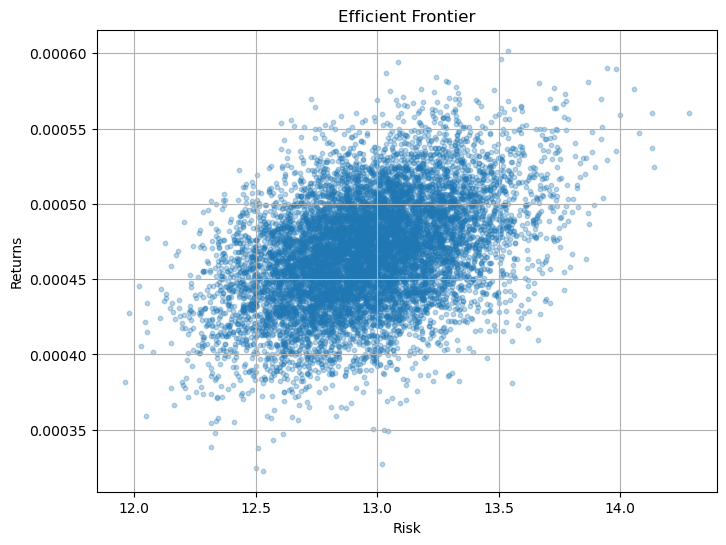

In [32]:
# Visualize efficient frontier
plt.figure(figsize=(8,6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.title("Efficient Frontier")
plt.xlabel("Risk")
plt.ylabel("Returns")
plt.grid()
plt.show()

In [33]:
# Minimum variance portfolio
min_var_port = portfolios.iloc[np.argmin(portfolios['Volatility'])]
min_var_port

Returns         0.000382
Volatility     11.963698
AAPL_weight     0.010335
AXP_weight      0.023969
BA_weight       0.001594
CAT_weight      0.002246
CSCO_weight     0.007422
Name: 4048, dtype: float64

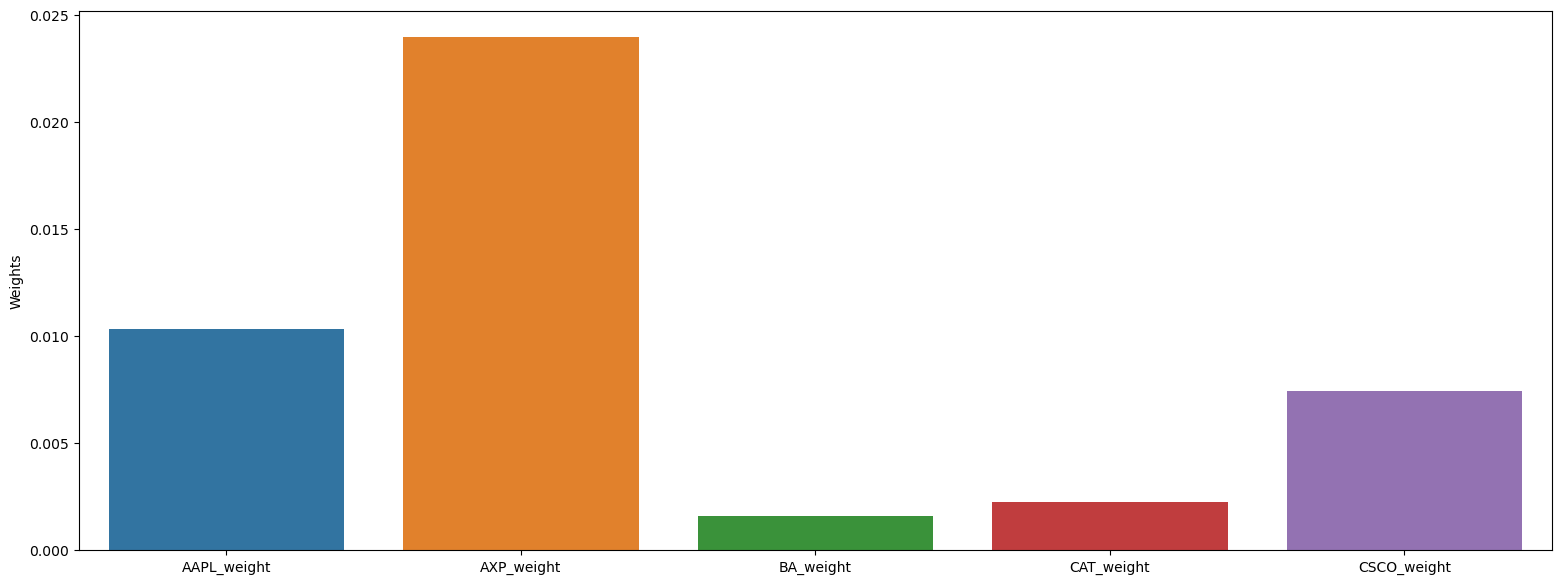

In [34]:
# Weights for Minimum variance portfolio
plt.figure(figsize=(19,7))
sns.barplot(x = min_var_port[2:].index, y = min_var_port[2:])
plt.ylabel("Weights")
plt.show()

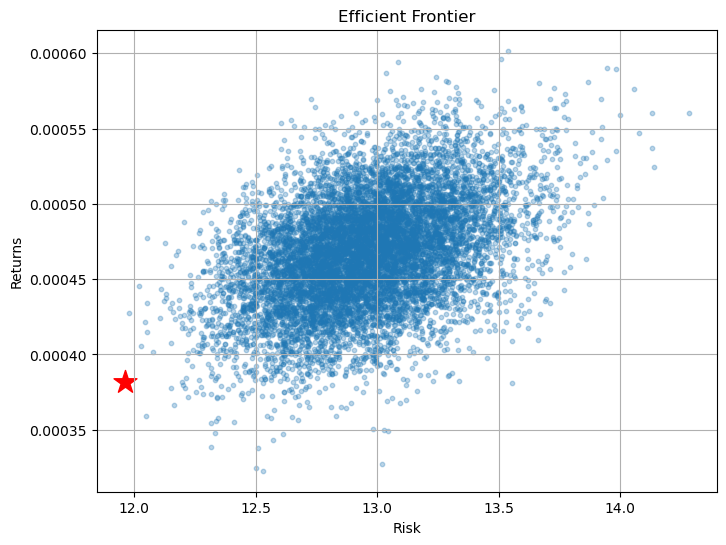

In [35]:
# Visualize Efficient frontier
plt.subplots(figsize=[8,6])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)

# Visualize Minimum variance portfolio
plt.scatter(min_var_port[1], min_var_port[0], color='r', marker='*', s=300)
plt.title("Efficient Frontier")
plt.xlabel("Risk")
plt.ylabel("Returns")
plt.grid()
plt.show()

### Sharpe Ratio (1 point)

* Calculate Sharpe Ratio for the assets

Sharpe Ratio, developed by Nobel Laureate William F Sharpe, is a measure of calculating risk adjusted return. It serves to help investors know about the returns on their investments relative to the risks they hold. The Sharpe Ratio is defined as

$$Sharpe Ratio = \frac{R_P - R_f}{\sigma_p} $$

where:

$R_p$ = return of portfolio

$R_f$ = risk-free rate

$\sigma_p$ = standard deviation of the portfolio’s excess return
​	

**Note:** The risk-free rate of return is the return of an investment with zero risks, meaning it's the return investors could expect for taking no risk.

The annual average risk free rate of return in USA during April 2019 was 3%. The daily risk free rate is computed as

$$R_f^{Daily} = \Big(1 + R_f^{Yearly} \Big)^{\frac{1}{360}} - 1 $$



In [36]:
# Risk-free return
rf = 0.00060
# Sharpe ratios for different weight combinations
sharpe_ratios = (portfolios['Returns'] - rf)/portfolios['Volatility']

# Highest sharpe ratio
optimal_idx = np.argmax(sharpe_ratios)
print("Highest Sharpe ratio: ", sharpe_ratios[optimal_idx])

Highest Sharpe ratio:  1.2469995555503678e-07


In [37]:
# Tangent portfolio
optimal_risky_port = portfolios.iloc[optimal_idx]
optimal_risky_port

Returns         0.000602
Volatility     13.538170
AAPL_weight     0.063786
AXP_weight      0.057676
BA_weight       0.058196
CAT_weight      0.019268
CSCO_weight     0.019436
Name: 6664, dtype: float64

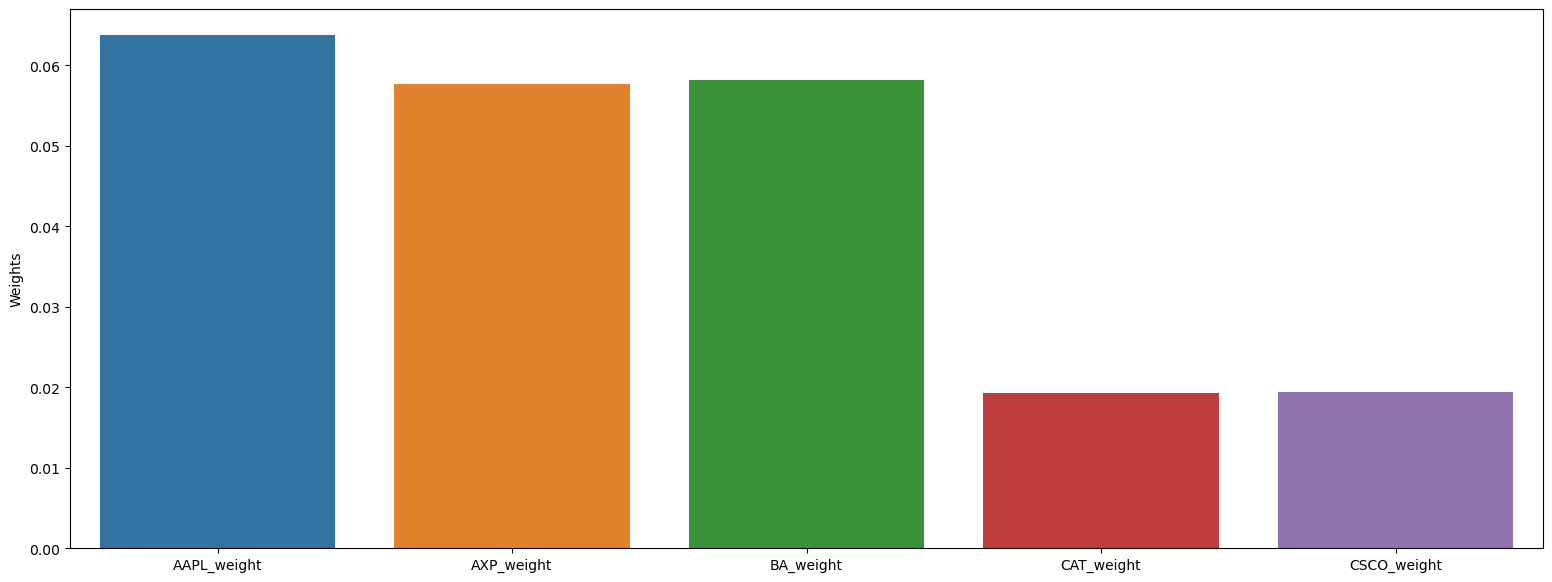

In [38]:
# Weights for Tangency portfolio
plt.figure(figsize=(19,7))
sns.barplot(x = optimal_risky_port[2:].index, y = optimal_risky_port[2:])
plt.ylabel("Weights")
plt.show()

In [39]:
# Diference b/w tangent portfolio and minimum variance portfolio
optimal_risky_port - min_var_port

Returns        0.000220
Volatility     1.574473
AAPL_weight    0.053451
AXP_weight     0.033706
BA_weight      0.056602
CAT_weight     0.017022
CSCO_weight    0.012014
dtype: float64

#### Plot the portfolio

* Find and plot the optimal portfolio using Sharpe Ratio
* Highlight the minimum risk and maximum return of the portfolio

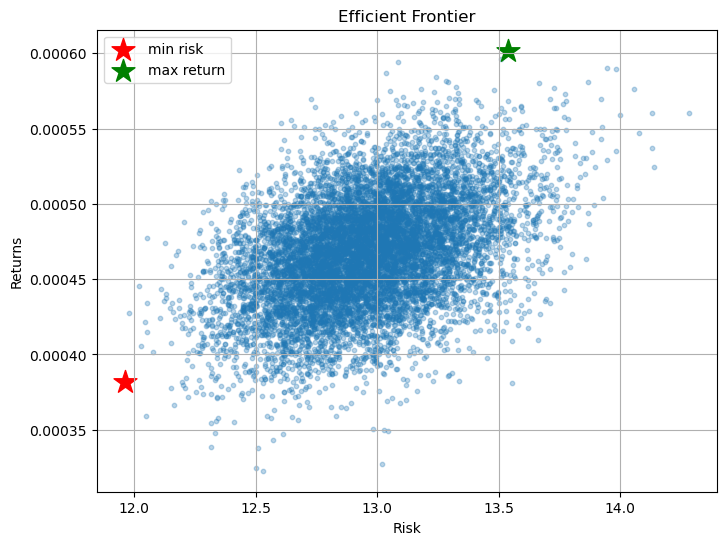

In [40]:
# Visualize Efficient frontier
plt.subplots(figsize=[8,6])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)

# Visualize Minimum variance portfolio
plt.scatter(min_var_port[1], min_var_port[0], color='r', marker='*', s=300, label="min risk")

# Visualize optimal or tangent portfolio
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=300,label="max return")
plt.title("Efficient Frontier")
plt.xlabel("Risk")
plt.ylabel("Returns")
plt.legend()
plt.grid()
plt.show()

### Report Analysis

* Try with a subset of assets and comment on diversification ratio

* Comment on the portfolio that consists of assets with highest return (irrespective of risk)

* Discuss the optimized portfolio and weights of the assets

* Based on K-Means clusters, find the subset of assets which is exhibiting greater sharpe ratio
